In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Circular Billiards Table

## Process outline (WIP)

1. Define position and velocity of initial ball
2. Find where ball will hit the edge (parametrize line and iterate?)
3. Find normal line to border using derivative
4. Find angle between normal line and e_1 
5. Rot, reflect, rot inv L 
6. Hit spot is new x and rot inv is new

$$ x = x_1 + t(x_2 - x_1) $$
$$ y = y_1 + t(y_2 - y_1) $$

Starting with a computational method rather than an analytical one to broaden perspective

In [98]:
#parametrization of line between p1 and p2-- input t in [0,1] to get [x,y]
def xy(t, p1, p2):
    x = p1[0] +  t*(p2[0]-p1[0])
    y = p1[1] +  t*(p2[1]-p1[1])
    return np.array([x,y])

#distance to boundary parametrized 
def param_boundary(t, x, v, boundary):
    return boundary(*xy(t, x, x + 2*v))

#reflect around line theta from x axis 
def R(theta):
    return np.array([[np.cos(theta)**2 - np.sin(theta)**2, 2*np.cos(theta)*np.sin(theta)],
             [2*np.cos(theta)*np.sin(theta), np.sin(theta)**2 - np.cos(theta)**2]])

In [99]:
#gives error in equation
#move all nonzero terms to one side 
#keep boundary within radius 1 
def circle(x,y):
    return np.abs(x**2 + y**2 - 1)

#return dy/dx
def d_circle(x,y):
    return (-1*x)/y

In [100]:
def ellipse(x,y):
    return np.abs((x**2)/2 + y**2 - 0.5)

#return dy/dx
def d_ellipse(x,y):
    return (x)/(-2*y)

In [101]:
#normalize
x = np.array([-1/np.sqrt(2),0])
v = np.array([.2,-.5])
v = v/np.linalg.norm(v)

In [102]:
t_min = minimize(param_boundary, .5, args = (x, v, ellipse), bounds = ((.1,1),),method = 'Powell').x[0]
m = xy(t_min, x, x + 2*v)

In [103]:
m

array([-0.45527795, -0.62957207])

In [104]:
# n = np.array([1, -1/d_circle(*m)])
# n /= np.linalg.norm(n)
# phi = np.arccos(np.dot(n, np.array([1,0])))
# print(n, '\n', phi)

In [105]:
n = np.array([1, -1/d_ellipse(*m)])
n /= np.linalg.norm(n)
phi = np.arccos(np.dot(n, np.array([1,0])))
print(n, '\n', phi)

[0.34003228 0.94041376] 
 1.2238451043289529


In [106]:
R(phi)

array([[-0.7687561 ,  0.63954207],
       [ 0.63954207,  0.7687561 ]])

In [107]:
v_new = -np.matmul(R(phi), v)
v_new

array([0.87930875, 0.47625215])

In [108]:
t_min = minimize(param_boundary, .2, args = (m, v_new, ellipse), bounds = ((.1,1),),method = 'Powell').x[0]
m_new = xy(t_min, m, m + 2*v_new)

In [109]:
# fig = plt.figure(figsize = (15,5))

# theta = np.linspace(0, 2*np.pi, 1000)
# plt.plot(np.cos(theta), np.sin(theta), color = 'black')
# plt.axis('equal')

# plt.plot([x[0], m[0]], [x[1], m[1]], color = 'red', ls = '--')
# plt.plot([m[0], m_new[0]], [m[1], m_new[1]], color = 'green', ls = 'dotted')

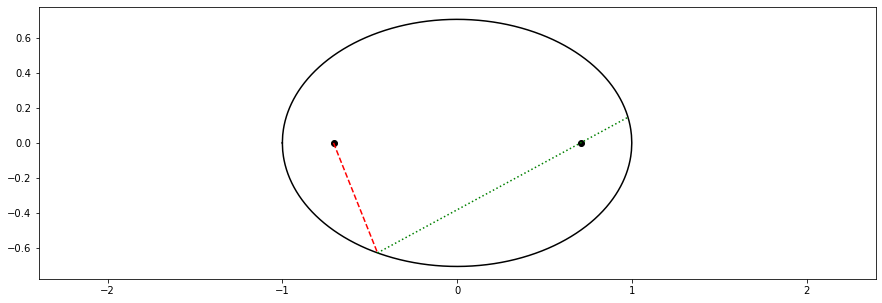

In [110]:
fig = plt.figure(figsize = (15,5))

a = np.linspace(-1, 1, 1000)
y_minus = -np.sqrt(1/2 - (a**2)/2)
y_plus = np.sqrt(1/2 - (a**2)/2)

plt.plot(np.concatenate([a,a[::-1]]), np.concatenate([y_minus,y_plus[::-1]]), color = 'black')
plt.axis('equal')

plt.plot([x[0], m[0]], [x[1], m[1]], color = 'red', ls = '--')
plt.plot([m[0], m_new[0]], [m[1], m_new[1]], color = 'green', ls = 'dotted')
plt.scatter(1/np.sqrt(2), 0, color = 'black')
plt.scatter(-1/np.sqrt(2), 0, color = 'black')

In [111]:
x[0]

-0.7071067811865475

## Next steps: turn above code into an interative process (variable changes into a loop with storage of step information in arrays or lists) 

### Future: Test boundary that is *not* a circle

also at least quadrant II is broken (try placing on f1 of ellipse) _or_ f2 and shoot down